In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.models as models
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
root_dir = 'C:/Users/thffh/Documents/CNN/project/datasets/dogs'
img_dir = '/images/Images/'
annot_dir = '/annotations/Annotation/'

In [4]:
labels_map = {}
for i, item in enumerate(os.listdir(root_dir + img_dir)):
    sub_folder = os.path.join(root_dir + img_dir, item)
    labels_map[sub_folder.split('-', maxsplit=1)[1]] = i

In [5]:
best_state_dict = torch.load('D:/coding/models/dogs/last_ckpt_transfer_res101_batch32_half.pth')

best_model = models.resnet101(weights=models.ResNet101_Weights.DEFAULT)
best_model.fc = nn.Linear(in_features=2048, out_features=120)
best_model.to(device)
best_model.get_parameter = best_model.load_state_dict(best_state_dict)

In [6]:
transformer = A.Compose([
    A.Resize(224, 224), 
    A.Normalize(), 
    ToTensorV2()
])

In [11]:
test_img = cv2.imread('./datasets/dogs/test/test.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

In [12]:
img_transed = transformer(image = test_img)

images = img_transed['image'].to(device)

best_model.eval()

with torch.no_grad():
    logit = best_model(images.unsqueeze(0))

pred = logit.max(dim=1)[1]

Text(0.5, 1.0, 'Sample #Maltese_dog')

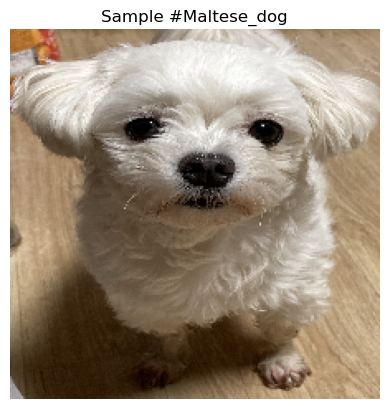

In [13]:
image = images.permute(1, 2, 0).to('cpu')
label = pred

idx = list(labels_map.values())[label]
name = list(labels_map.keys())[idx]

mean=torch.tensor([0.485, 0.456, 0.406]) 
std=torch.tensor([0.229, 0.224, 0.225])
image.mul_(std)
image.add_(mean)

plt.axis('off')
plt.imshow(image)
plt.title('Sample #{}'.format(name))